In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def read_and_join(paths):
    dfs = []
    for name, path in paths.items():
        df = pd.read_csv(path)
        df['Name'] = name
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True, )

In [3]:
def yes_no_to_int(x):
    if x == 'Yes':
        return 1
    else: 
        return 0

In [4]:
def pandda_name_to_final_name(x):
    if x == 'PanDDA 1 Int':
        return 'PanDDA 1'
    else:
        return 'PanDDA 2'

In [5]:
paths = {
    'BAZ2BA': '../data/Missing Hits - BAZ2BA.csv',
    'BRD1A': '../data/Missing Hits - BRD1A.csv',
    'JMJD2DA': '../data/Missing Hits - JMJD2DA.csv',
    'JMJD2DA Site 11': '../data/Missing Hits - JMJD2DA Site 11.csv',
}

In [6]:
df = read_and_join(paths)
df

,Dataset,Residue,PanDDA 1,PanDDA 2,Notes,Name
0,BAZ2BA-x447,A1871,No,Yes,/Slightly peripheral surface hit,BAZ2BA
1,BAZ2BA-x556,A1941,No,Yes,//Fairly close to symmetry - probable interact...,BAZ2BA
2,BAZ2BA-x651,A1965,No,Yes,/A1965/Good,BAZ2BA
3,BAZ2BA-x497,A1944,No,Yes,/A1965/Good,BAZ2BA
4,BAZ2BA-x446,A1944,No,Yes,/A1944/Slightly mid density,BAZ2BA
...,...,...,...,...,...,...
145,JMJD2DA-x611,A37,Yes,Yes,/A37/SITE 11 INTERFACE,JMJD2DA Site 11
146,JMJD2DA-x396,A231,Yes,Yes,/A231/INTERFACE IN SITE 11,JMJD2DA Site 11
147,JMJD2DA-x637,A231,Yes,Yes,/A231/INTERFACE IN SITE 12,JMJD2DA Site 11
148,JMJD2DA-x639,A231,Yes,Yes,/A231/INTERFACE IN SITE 13,JMJD2DA Site 11


In [7]:
df['PanDDA 1 Int'] = df['PanDDA 1'].apply(yes_no_to_int)
df['PanDDA 2 Int'] = df['PanDDA 2'].apply(yes_no_to_int)

In [8]:
df_aggregated = df.groupby(by='Name')[['PanDDA 1 Int', 'PanDDA 2 Int']].sum()
df_aggregated

,PanDDA 1 Int,PanDDA 2 Int
Name,,
BAZ2BA,9,19
BRD1A,55,68
JMJD2DA,27,45
JMJD2DA Site 11,5,13


In [9]:
df_aggregated_2 = df_aggregated.melt(value_vars=["PanDDA 1 Int", 'PanDDA 2 Int'], ignore_index=False)
df_aggregated_2

,variable,value
Name,,
BAZ2BA,PanDDA 1 Int,9
BRD1A,PanDDA 1 Int,55
JMJD2DA,PanDDA 1 Int,27
JMJD2DA Site 11,PanDDA 1 Int,5
BAZ2BA,PanDDA 2 Int,19
BRD1A,PanDDA 2 Int,68
JMJD2DA,PanDDA 2 Int,45
JMJD2DA Site 11,PanDDA 2 Int,13


In [10]:
df_aggregated_2['PanDDA'] = df_aggregated_2['variable'].apply(pandda_name_to_final_name)
df_aggregated_2

,variable,value,PanDDA
Name,,,
BAZ2BA,PanDDA 1 Int,9,PanDDA 1
BRD1A,PanDDA 1 Int,55,PanDDA 1
JMJD2DA,PanDDA 1 Int,27,PanDDA 1
JMJD2DA Site 11,PanDDA 1 Int,5,PanDDA 1
BAZ2BA,PanDDA 2 Int,19,PanDDA 2
BRD1A,PanDDA 2 Int,68,PanDDA 2
JMJD2DA,PanDDA 2 Int,45,PanDDA 2
JMJD2DA Site 11,PanDDA 2 Int,13,PanDDA 2


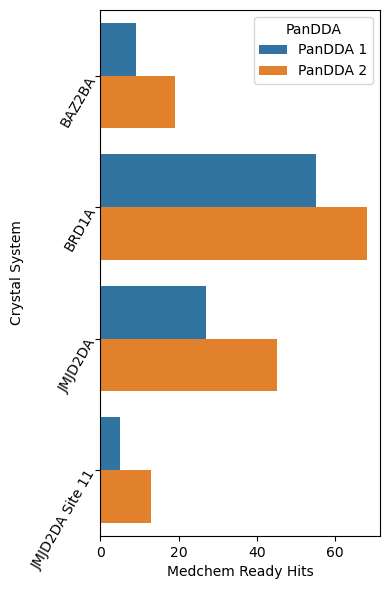

In [40]:
fig, ax = plt.subplots(1,1,figsize=(4,6))
g = sns.barplot(
    data=df_aggregated_2, 
    # kind="bar",
    y="Name", x='value', hue='PanDDA' ,
    legend=True,
    ax=ax
    #orient='h'
)
# g.despine(left=True)
# g.set_axis_labels("A", "Body mass (g)")
# g.axes[0,0].legend(  )
# plt.show()
# g.add_legend()
# plt.show()
# g.legend.set_title("")
# g.legend()
g.set_xlabel('Medchem Ready Hits')
g.set_ylabel('Crystal System')
# plt.yticks(rotation=90, ha='top')
# for label in ax.get_yticklabels():
#   label.set_rotation(45)
#   label.set_ha('left')
ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), rotation=60, rotation_mode='anchor')
fig.align_ylabels()
# ax.tick_params(axis='y', labelrotation=90, ha='right')
fig.tight_layout()
fig.savefig('FigCredibleHits.png')

In [12]:
g.axes[0,0
    ]

TypeError: 'Axes' object is not subscriptable